# PCA to cancer dataset

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import mglearn
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\rissu\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


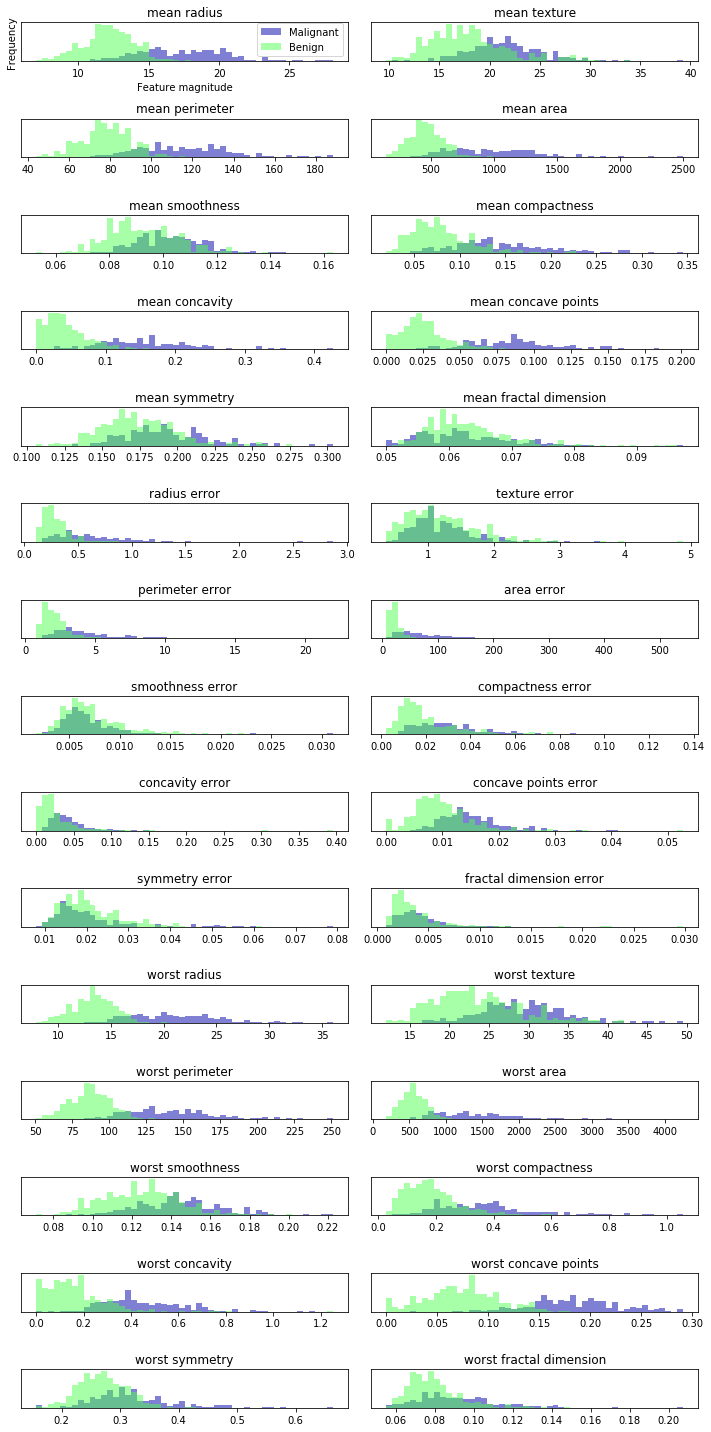

In [2]:
fig,axes=pl.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['Malignant','Benign'],loc='best')
fig.tight_layout()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [4]:
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)
x_pca=pca.transform(X_scaled)

In [27]:
X_scaled.shape,x_pca.shape,x_pca[0].shape

((569, 30), (569, 2), (2,))

Text(0, 0.5, 'Second principal component')

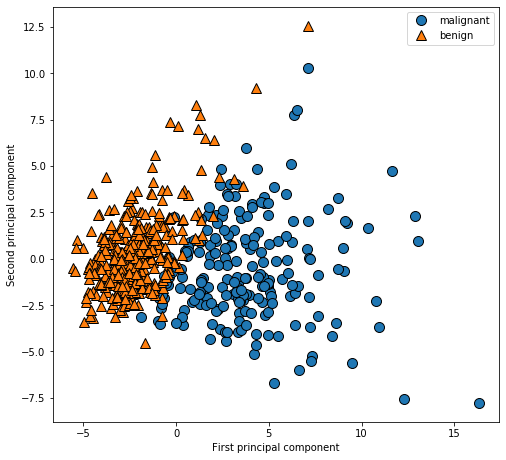

In [28]:
pl.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],cancer.target)
pl.legend(cancer.target_names, loc="best")
pl.gca().set_aspect("equal")
pl.xlabel("First principal component")
pl.ylabel("Second principal component")

<BarContainer object of 569 artists>

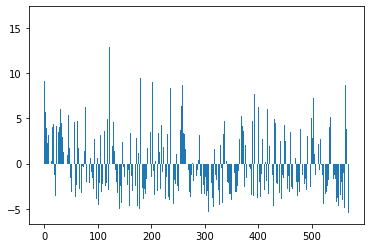

In [29]:
pl.bar(range(569),x_pca[:,0])

<BarContainer object of 569 artists>

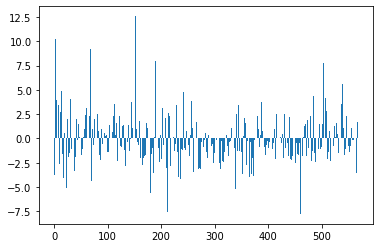

In [30]:
pl.bar(range(569),x_pca[:,1])

In [31]:
from collections import Counter
Counter(cancer.target)

Counter({0: 212, 1: 357})

In [32]:
cancer.data.shape

(569, 30)

In [33]:
pca.components_.shape

(2, 30)

In [34]:
X_scaled.shape

(569, 30)

In [35]:
x_pca.shape

(569, 2)

In [36]:
pca.components_.shape

(2, 30)

Text(0, 0.5, 'Principal components')

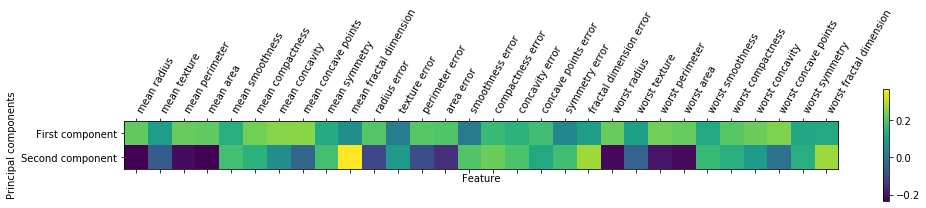

In [37]:
pl.matshow(pca.components_,cmap='viridis')
pl.yticks([0, 1], ["First component", "Second component"])
pl.colorbar()
pl.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
pl.xlabel("Feature")
pl.ylabel("Principal components")

In [38]:
# from sklearn.datasets import fetch_lfw_people
# people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)

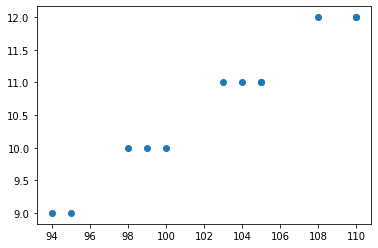

In [39]:
import matplotlib.pyplot as pl
a=[10,12,11,9,9,10,11,12,11,10,11,12]
b=[100,110,105,94,95,99,104,108,105,98,103,110]
pl.scatter(b,a)
pl.show()

In [40]:
import numpy as np

In [41]:
cv=np.cov(a,b)
cv

array([[ 1.15151515,  5.75757576],
       [ 5.75757576, 29.53787879]])

In [42]:
from numpy import linalg as LA

In [43]:
a,w=LA.eig(cv)

In [44]:
np.round(a,2)

array([3.000e-02, 3.066e+01])

In [45]:
b

[100, 110, 105, 94, 95, 99, 104, 108, 105, 98, 103, 110]

<BarContainer object of 2 artists>

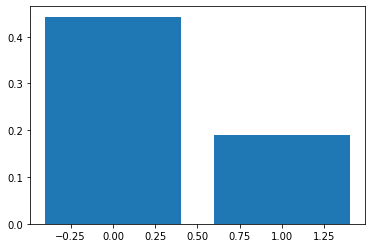

In [46]:
pl.bar(range(2),pca.explained_variance_ratio_)